# Brownian Motion for Financial Mathematics
### This notebook will be used for investigating the stochastic processes used in real-world financial mathematics. We will consider a symmetrical random walk, scaled random walk, and brownian motion.

In [4]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Symmetric Random Walk
## P[Mn >= r, Yn = b] =\begin{cases}P\left[Yn\:=\:b\right]&b\ge r\\ P\left[Yn\:=\:2r\:-\:b\right]&b<r\end{cases}

### Where t is time where the path touches the line y = r for the first time. 

In [12]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

In [13]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
random_paths = np.concatenate([origin, steps]).cumsum(axis=0)

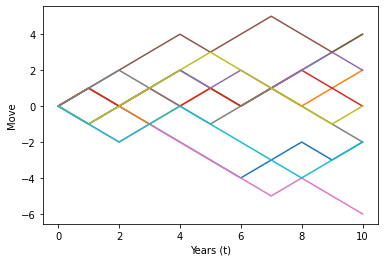

In [14]:
plt.plot(random_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# Scaled Random Walk
### A scaled random walk is a theory where there are a consecutive random steps in a discrete time. At each time (step) the value can either increase or decrease with a fixed amount (1, -1). If the past steps are independent increments, then it will result as a Markov process.

## Scaled Random walk
#### Xi = Mi − Mi−1 ...where... Xi = σsqrt ∆t ...or... Xi = −σsqrt∆t

#### value of time T is the value at the random walk at time zero plus the sum of changes in the random walk during the interval [0,T].
#### MT = M0 + Sum of N where i =1, and Xi

In [18]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
[quadratic_variation(path) for path in random_paths.T[:4]]
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in random_paths[1:11]]

[1.0, 1.6, 1.64, 3.24, 4.16, 5.96, 7.4, 6.4, 7.36, 8.8]

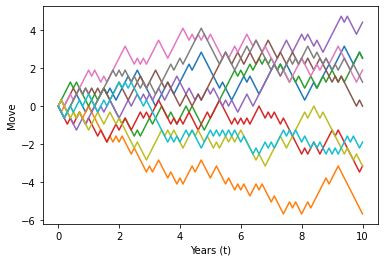

[10.0, 10.0, 10.0, 10.0]

In [19]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)
time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()
# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]
[quadratic_variation(path) for path in srw_paths.T[:4]]

# Brownian Motion
#### Brownian motion where W0 = 0, and W has independent increments, has gaussian distribution, and continuous sample paths.

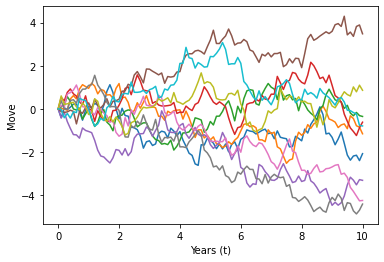

[0.088, 0.266, 0.357, 0.294, 0.391, 0.453, 0.777, 0.572, 0.902, 0.628]

In [21]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
brownian_paths = np.concatenate([origin, steps]).cumsum(axis=0)
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T
plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in brownian_paths.T[:4]]
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in brownian_paths[1:11]]